<div style="float:left">
    <h1 style="width:600px">Objective 1: Spatial Analysis: Accessibility</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

### Geopandas

In [4]:
import geopandas as gpd
print(gpd.__version__)
# import r5py as r5py
# from r5py.sampledata import helsinki, sao_paulo

0.14.4


### Other Libs

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib
# import seaborn as sn

from time import time

In [7]:
import shapely
print("shapely version:", shapely.__version__)

shapely version: 2.0.1


# Start the analysis of Greater London

# 1. Loading the files

## 1.1 London LSOAs Geojson File

In [11]:
# Import Libs
import geopandas as gpd

# Reading geojson files 
London_LSOA_gdf = gpd.read_file("Data/London_second_phase/London_LSOA_2021.geojson")

In [12]:
London_LSOA_gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [13]:
# Convert GeoDataFrame to DataFrame
London_LSOA_dropped = London_LSOA_gdf.to_crs(epsg='27700')

## 1.2 Plot London LSOAs 

In [15]:
from matplotlib_scalebar.scalebar import ScaleBar

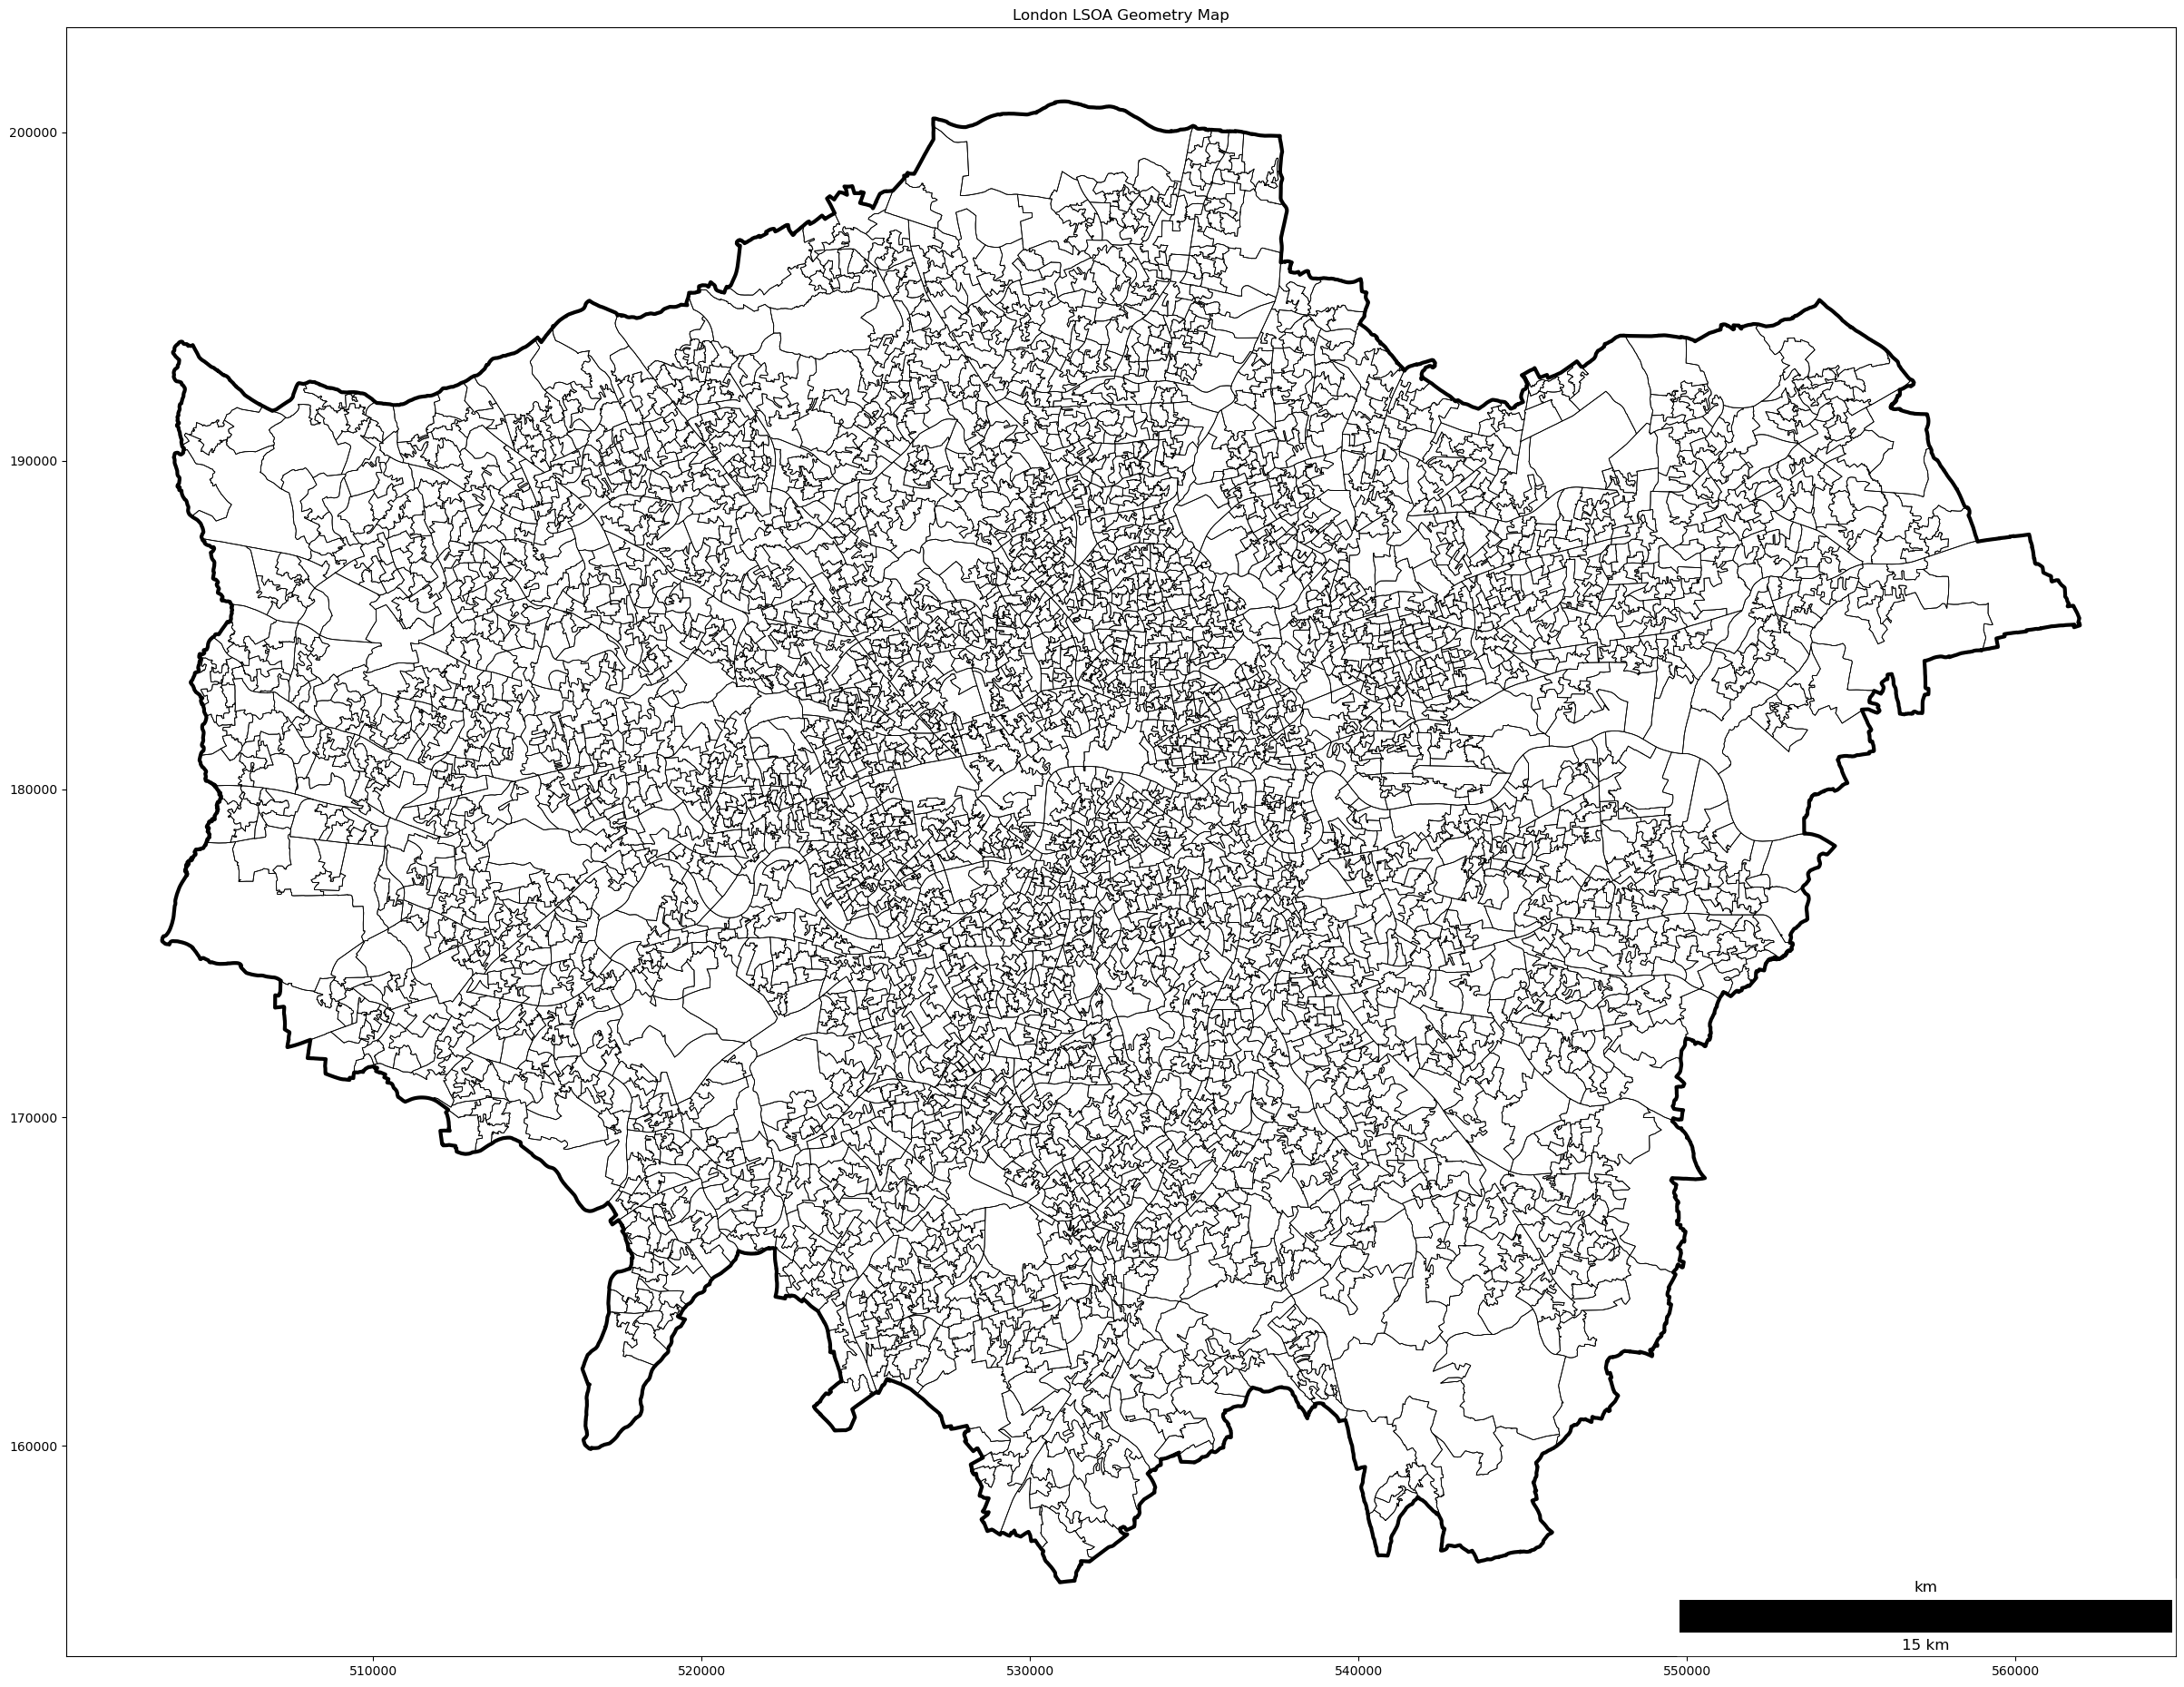

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 30))

# Plot the London boundary map as the background
London_LSOA_dropped.boundary.plot(ax=ax, color='black', linewidth=0.6)

# Plot the outermost boundary
outer_boundary = gpd.GeoSeries([London_LSOA_dropped.unary_union])
outer_boundary.boundary.plot(ax=ax, color='black', linewidth=3)  # Adjust linewidth to make it thicker

# Add title
plt.title("London LSOA Geometry Map")

# Add a scale bar with units in kilometers (km)
scalebar = ScaleBar(
    dx=1,  # The actual length corresponding to each map unit, set to 1 to represent 1 map unit = 1 meter
    units='m',  # Set units to meters
    dimension="si-length",  # Use SI units
    location='lower right',  # Set the location to the lower right corner
    scale_loc='bottom',  # Position of the scale numbers (above or below)
    length_fraction=0.25,  # Fraction of the plot width that the scale bar occupies
    width_fraction=0.02,  # Width of the scale bar
    color='black',  # Color of the scale bar
    box_color='white',  # Background color of the scale bar
    box_alpha=0.8,  # Background transparency
    font_properties={'size': 12},  # Font size
    label='km'  # Label for the scale bar
)
ax.add_artist(scalebar)

# Save the image to the specified path
plt.savefig("Plot_final_0826/London LSOAs.png")

# Display the plot
plt.show()